In [34]:
import os
import numpy as np
from matplotlib_surface_plotting import plot_surf

from gene_viz.utils import get_data_path, load_mesh_geometry
from gene_viz.data_loader import load_data
from gene_viz.mni_atlas_loader import mni_atlas_loader
from gene_viz.interpolation.interpolation_core import interpolate
from gene_viz.interpolation_viz import make_3d_interpolated_grid_mni, plot_volumetrics_plane_alpha, get_point_density, show_figure
from gene_viz.viewer.plot_surf_and_plane import concatenate_meshes

In [4]:
# Initialise variables 

gene_name = 'PVALB'
cmap = 'jet'
slice = int(100)


In [6]:
# Load gene expression data 

coords, samples = load_data(gene_name)

In [17]:
# Plot and scatter data



[0.59637862 0.66663608 0.79458685 ... 0.55118007 0.62592726 0.5608639 ]


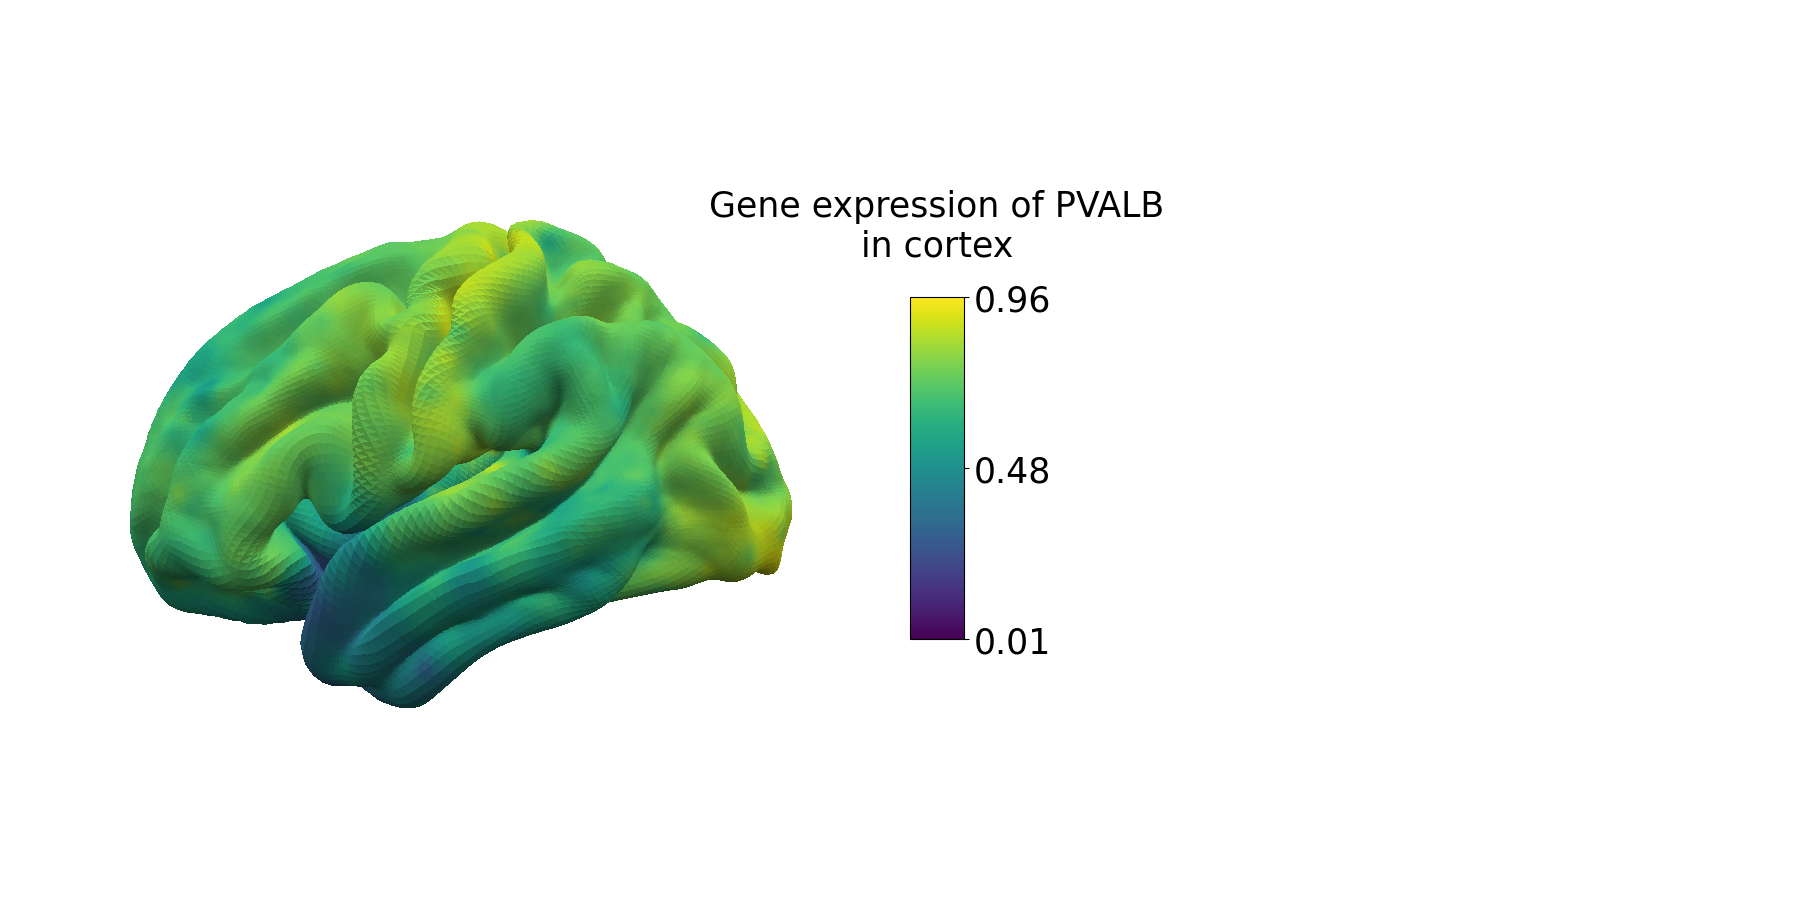

In [ ]:
# plot gene expression in cortex

#load mesh
cortical_mesh_file_path = os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii')
mesh = load_mesh_geometry(cortical_mesh_file_path)

# interpolate
interpolated_values = interpolate(samples,coords, mesh['coords'])

# plot
plot_surf(mesh['coords'], mesh['faces'], 
          interpolated_values, 
          rotate=90,
          base_size = 10,
          cmap_label = f'Gene expression of {gene_name}\nin cortex',
          )

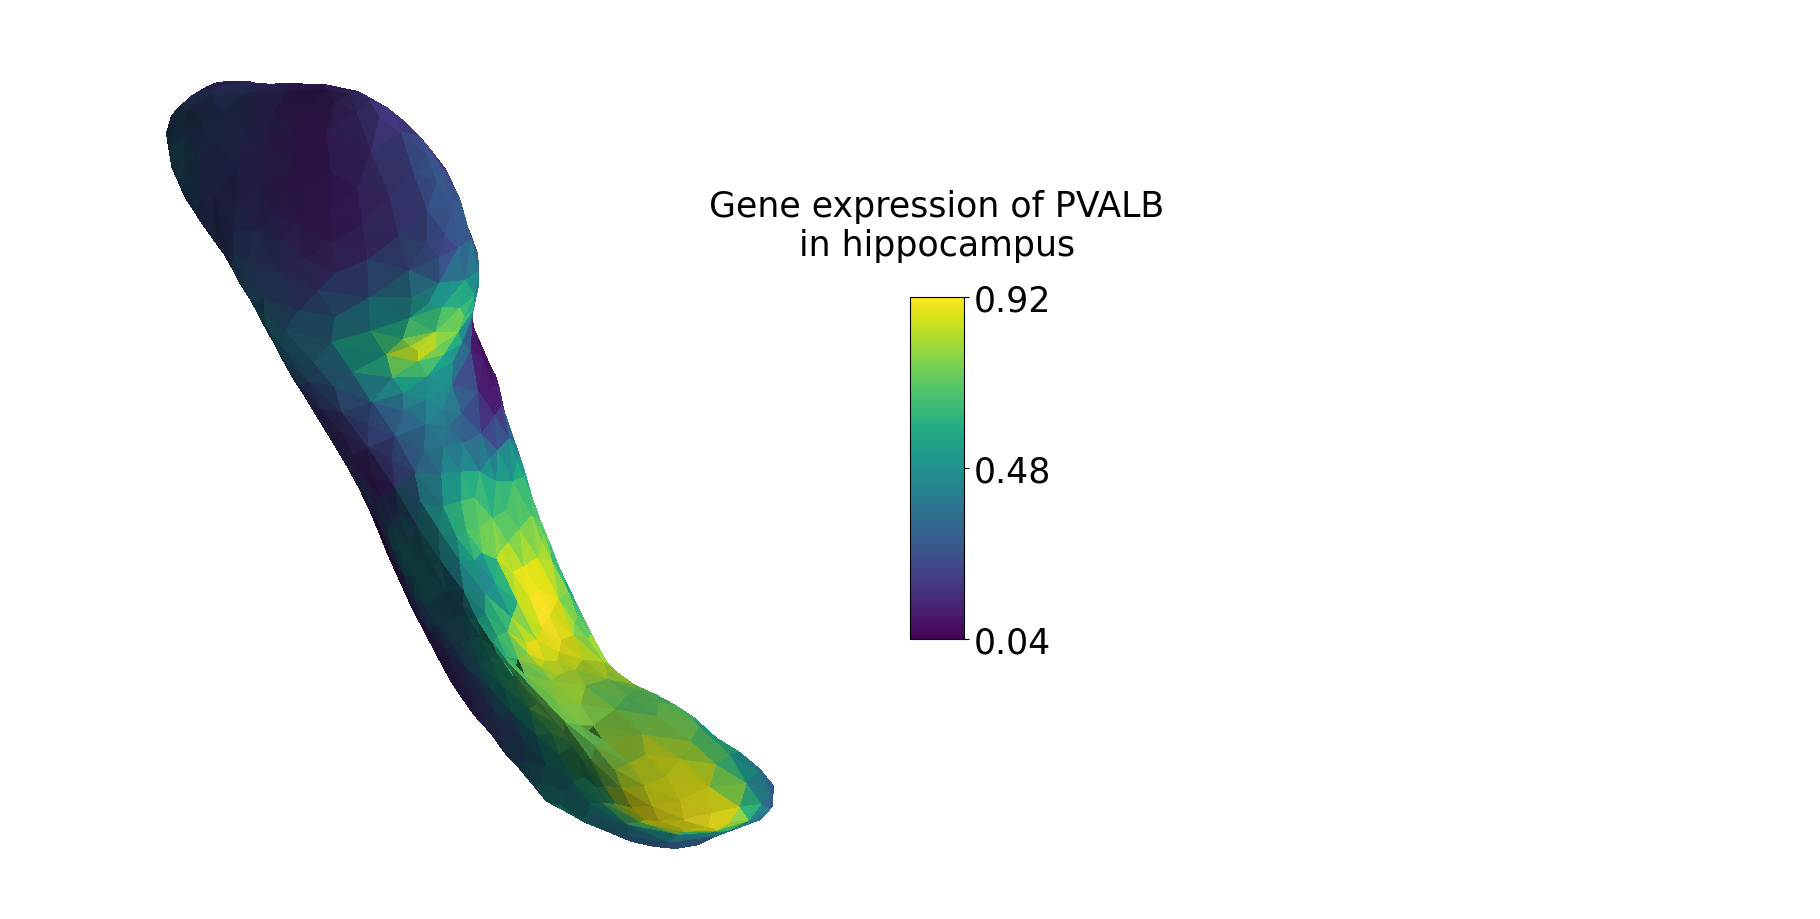

In [28]:
# plot gene expression in cortex

# load mesh
subcortical_mesh_file_path = os.path.join(get_data_path(),'Right-Hippocampus_meshfile.surf.gii')
subc_mesh = load_mesh_geometry(subcortical_mesh_file_path)

# interpolate gene data to meshes 
subc_interpolated_values = interpolate(samples,coords, subc_mesh['coords'])

# plot
plot_surf(subc_mesh['coords'], subc_mesh['faces'], subc_interpolated_values, 
          rotate=90,
          x_rotate=10,
          base_size = 10,
          cmap_label = f'Gene expression of {gene_name}\nin hippocampus',
          )

In [ ]:
# plot multiple meshes



In [ ]:
# plot gene expression in slice 

# choose gene
gene_name = 'PVALB'

# load expression point data 
coords, samples = load_data(gene_name)
# load mni nifty image
mni_img, mni_vol, affine = mni_atlas_loader()

# interpolate using default optimised model 
grid_values, X, Y, Z = make_3d_interpolated_grid_mni(
    samples=samples,
    sample_coords=coords,
    interp_func=interpolate,
    mni_img=mni_img,
    resolution=1  
)

# get number of expression sample points within "search_radius" mm of each point in space. 
# "search_k" is the maximum number of points searched for.
min_distance_vol, alpha_mask = get_point_density(coords=coords,search_radius=10,search_k=10,mni_img=mni_img,resolution=1)



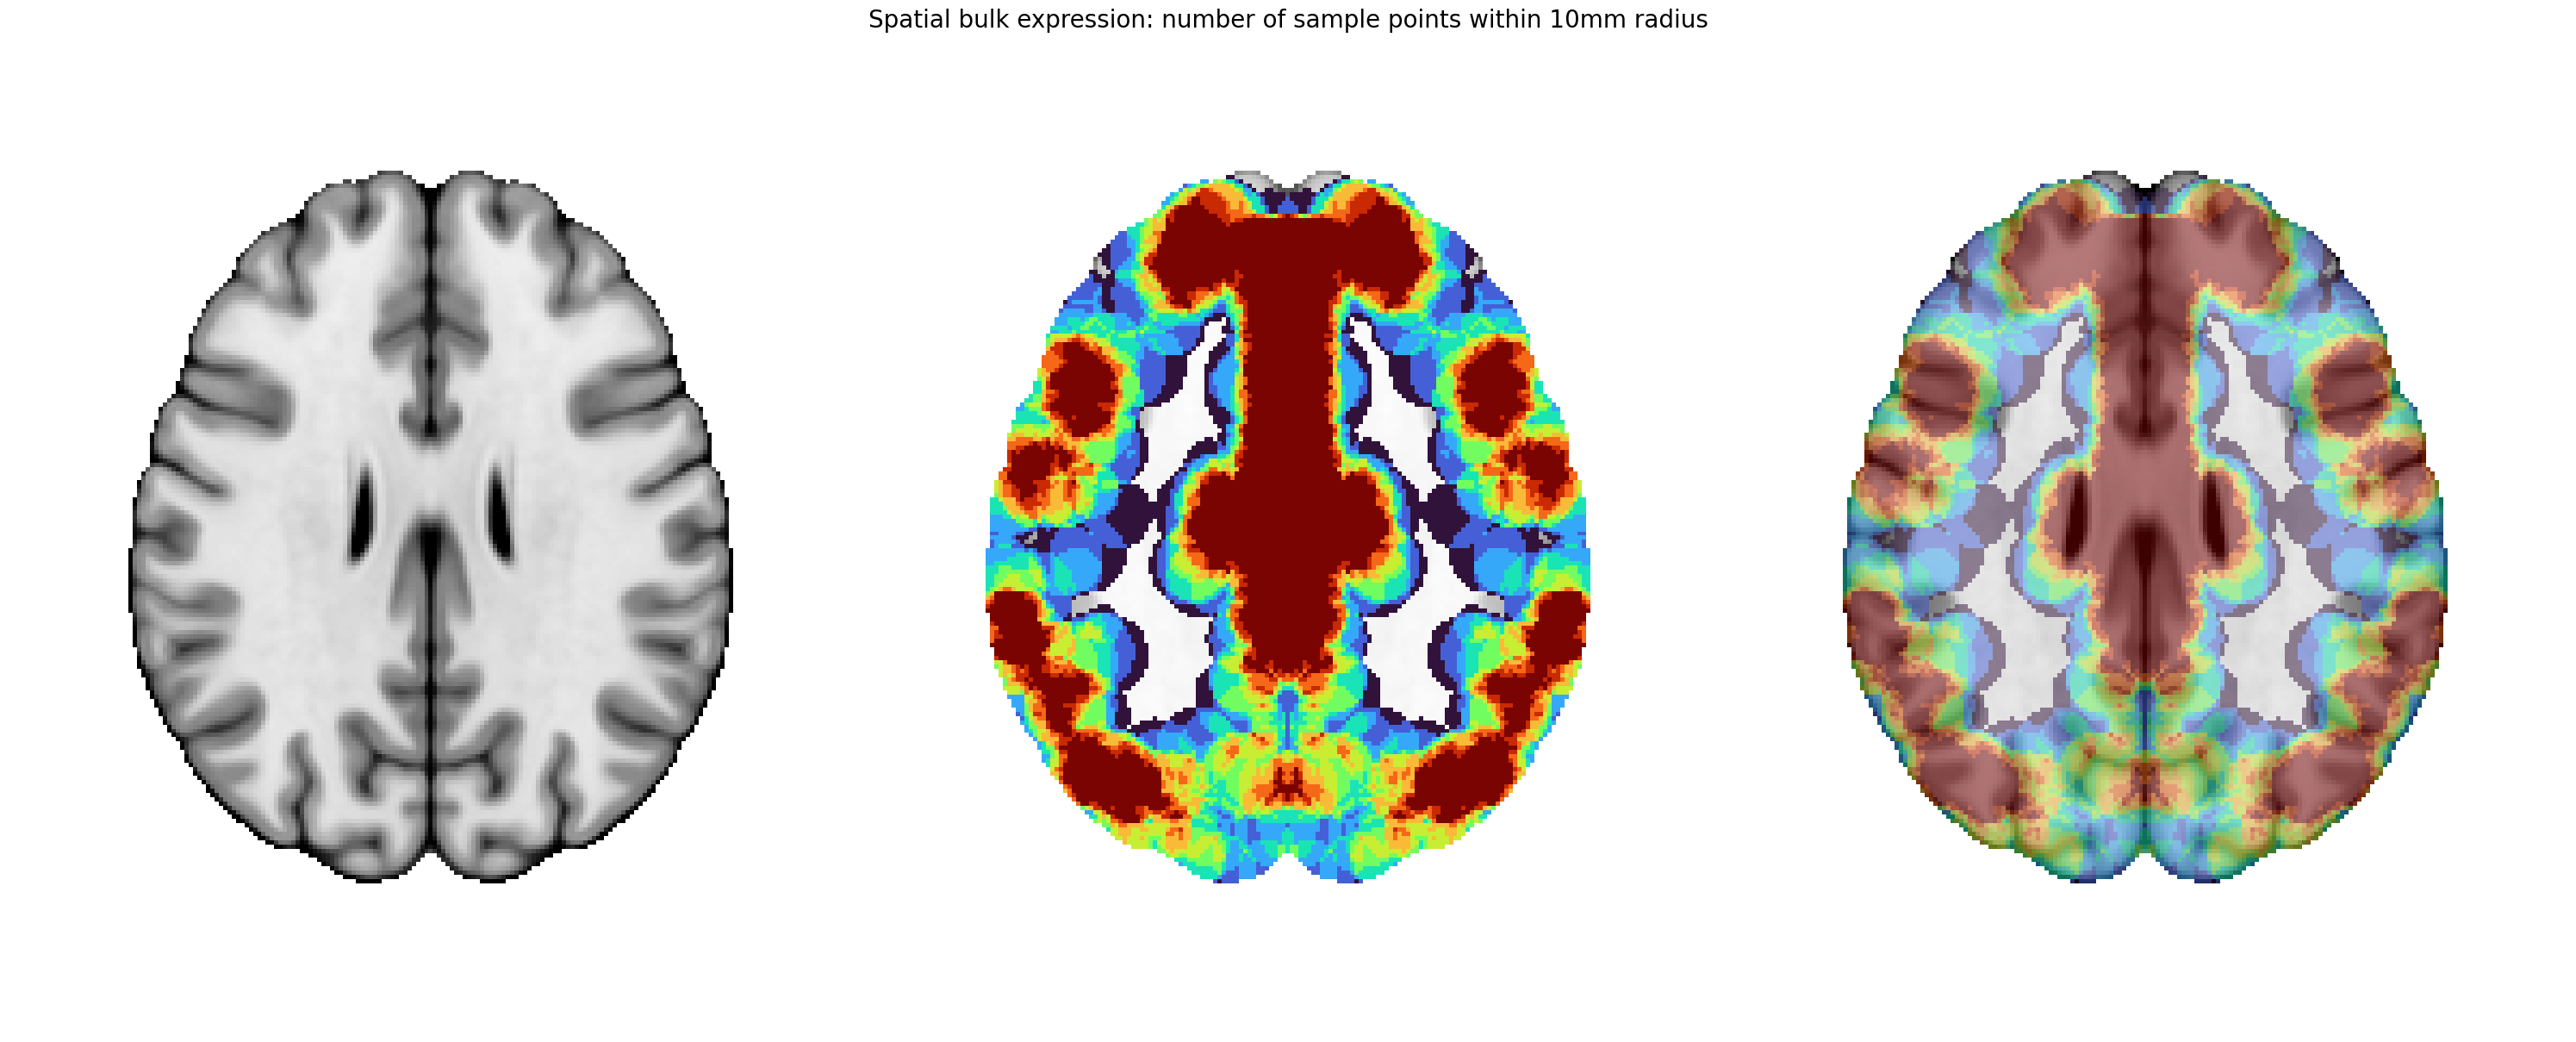

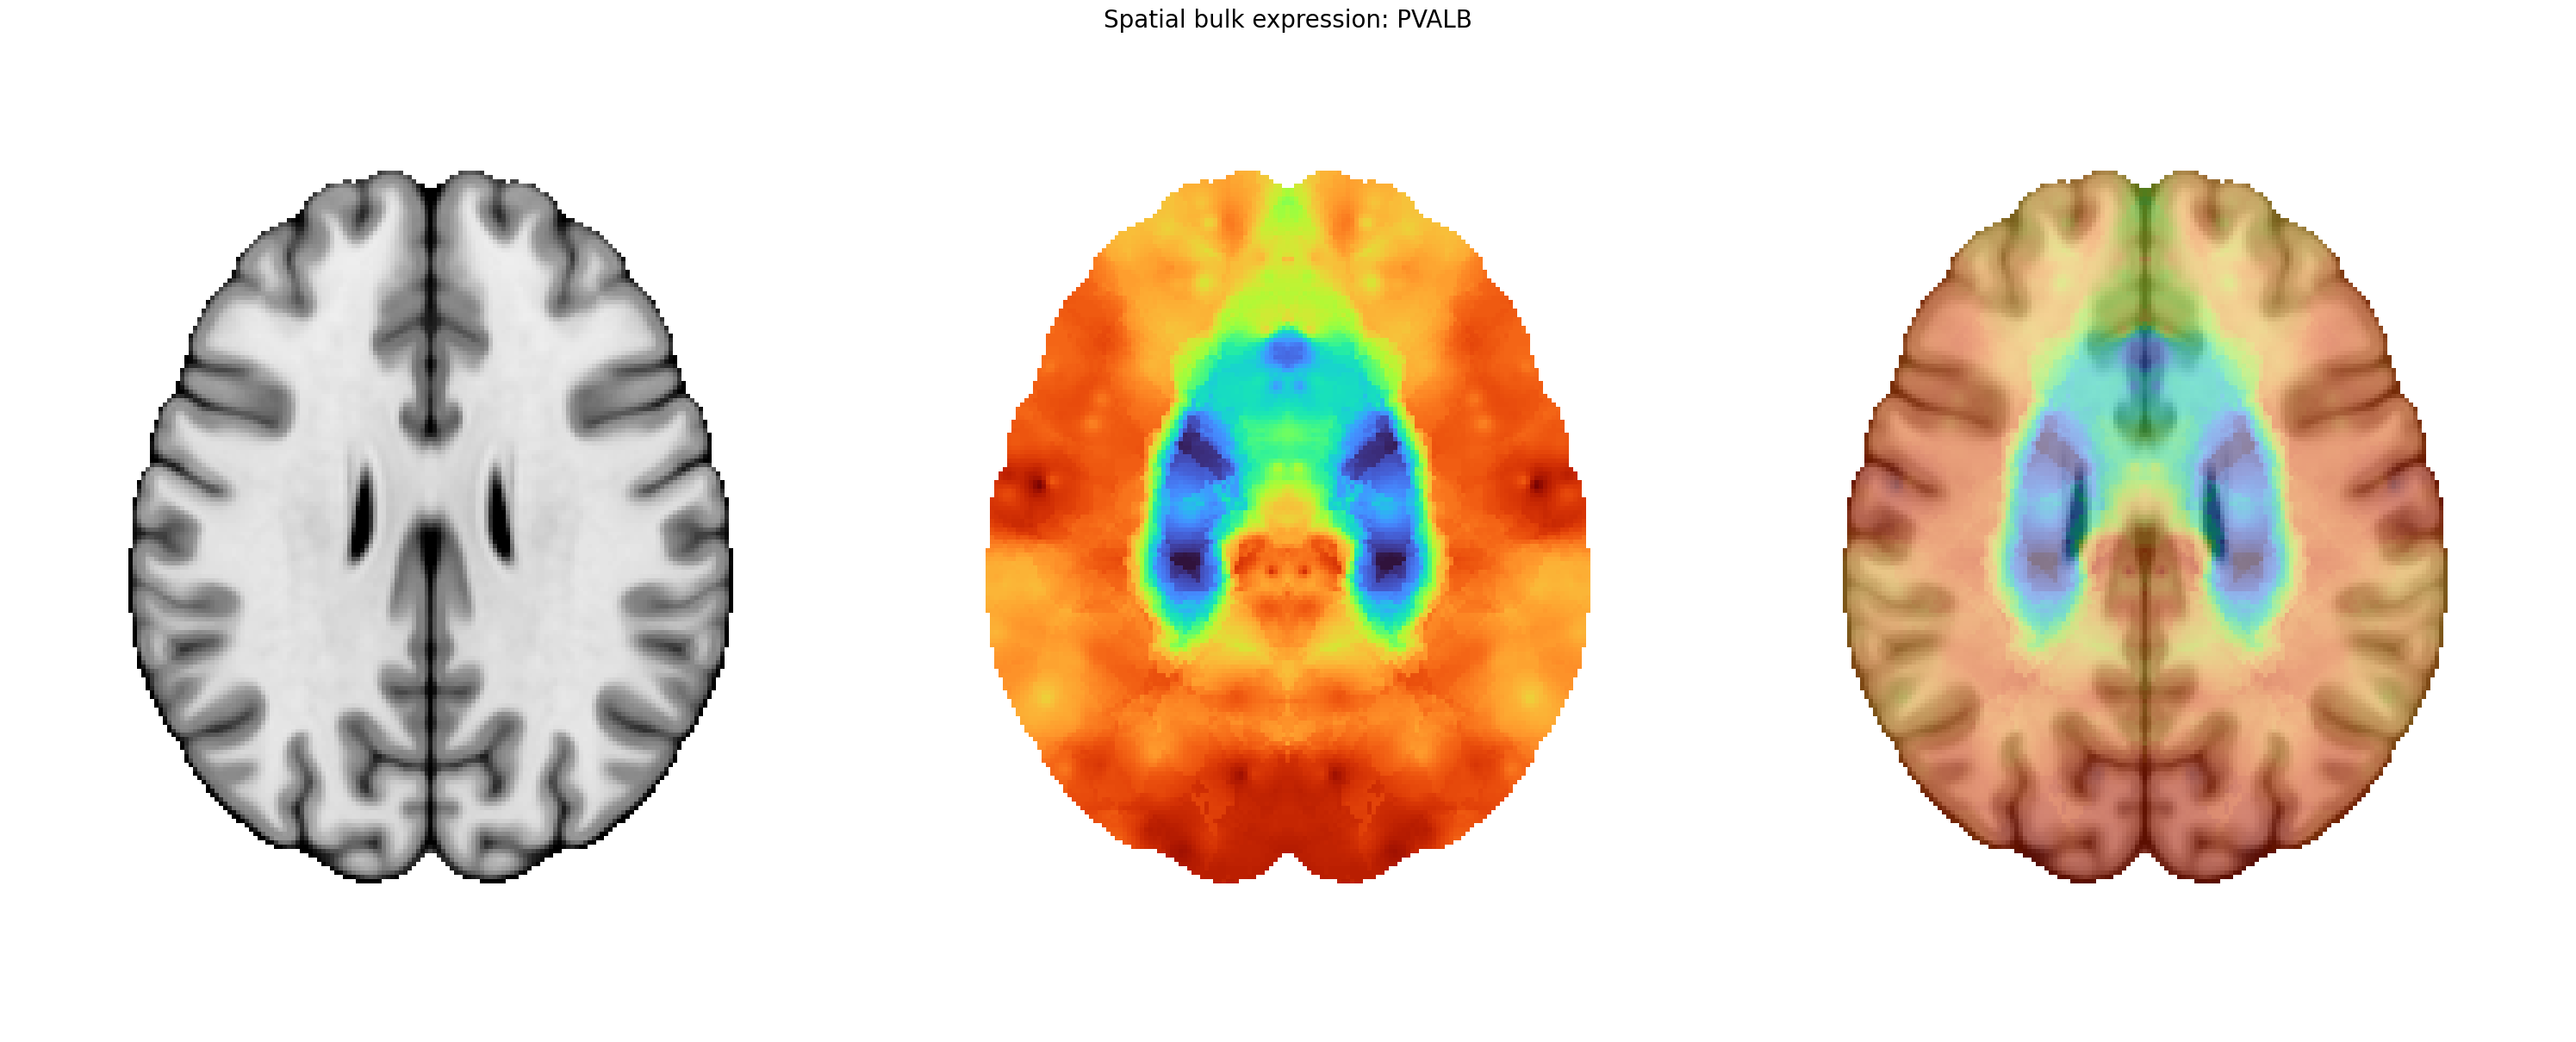

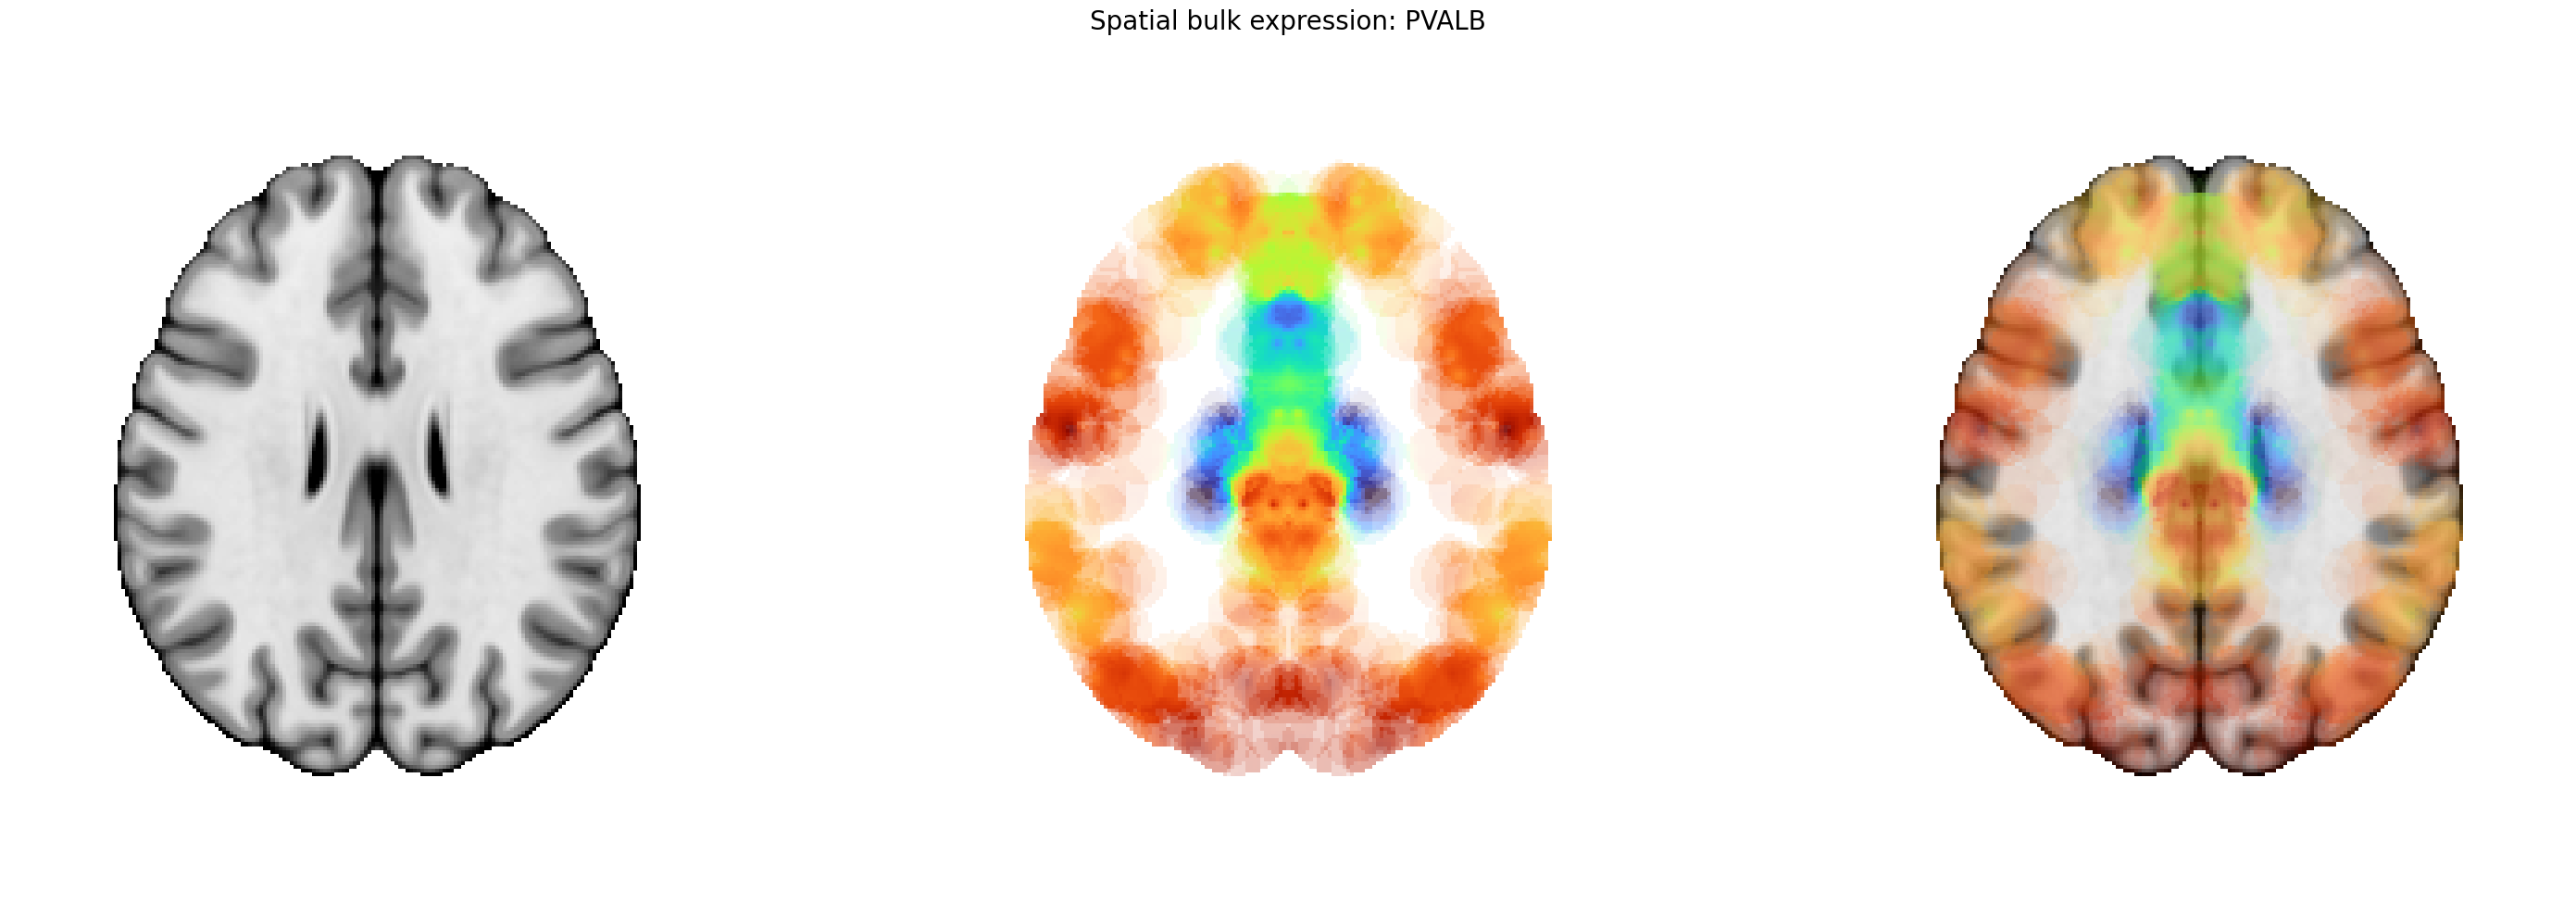

In [30]:
# show number of local points overlaid on MRI. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha('number of sample points within 10mm radius', 
                                   mni_vol, min_distance_vol, section=slice, orientation=2, alpha_mask=None)
show_figure(fig)

# show interpolated gene expression overlaid on MRI. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha(gene_name, mni_vol, grid_values, section=slice, orientation=2, alpha_mask=None)
show_figure(fig)

# show interpolated gene expression overlaid on MRI, with alpha dependant on point density. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha(gene_name, mni_vol, grid_values, section=slice, orientation=2, alpha_mask=alpha_mask)
show_figure(fig)

[array([0.59637862, 0.66663608, 0.79458685, ..., 0.55118007, 0.62592726,
       0.5608639 ], shape=(32492,))]
[array([0.59637862, 0.66663608, 0.79458685, ..., 0.55118007, 0.62592726,
       0.5608639 ], shape=(32492,)), array([0.96300092, 0.95526139, 0.95267964, ..., 0.67552161, 0.86341941,
       0.74013951], shape=(4758,))]
[array([0.59637862, 0.66663608, 0.79458685, ..., 0.55118007, 0.62592726,
       0.5608639 ], shape=(32492,)), array([0.96300092, 0.95526139, 0.95267964, ..., 0.67552161, 0.86341941,
       0.74013951], shape=(4758,)), array([0.61331885, 0.58430567, 0.80092192, ..., 0.56138122, 0.58004536,
       0.57774241], shape=(32492,))]
[array([0.59637862, 0.66663608, 0.79458685, ..., 0.55118007, 0.62592726,
       0.5608639 ], shape=(32492,)), array([0.96300092, 0.95526139, 0.95267964, ..., 0.67552161, 0.86341941,
       0.74013951], shape=(4758,)), array([0.61331885, 0.58430567, 0.80092192, ..., 0.56138122, 0.58004536,
       0.57774241], shape=(32492,)), array([0.81659882,

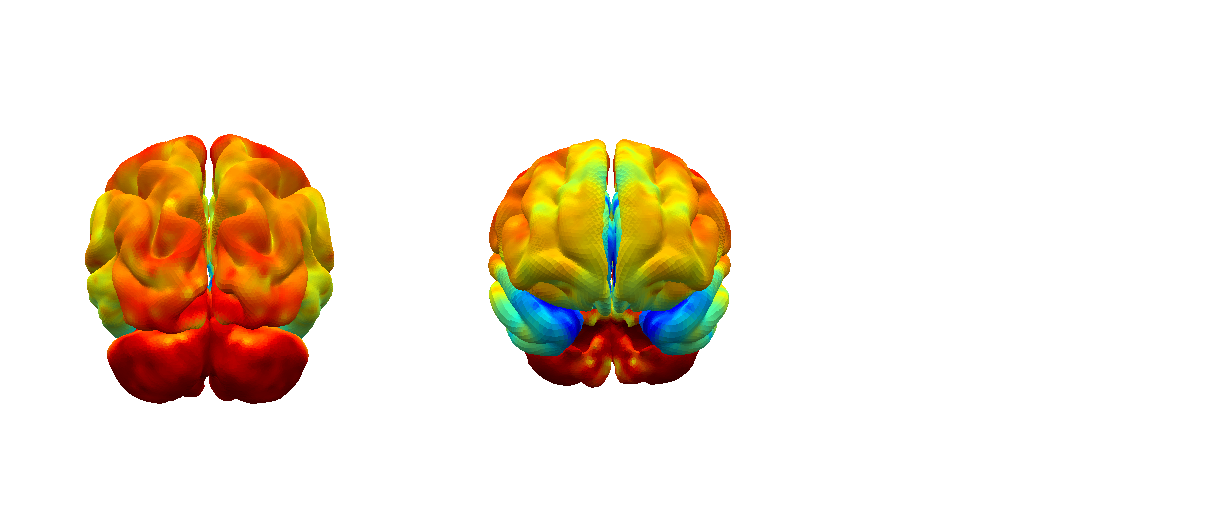

In [ ]:
# get cortex and cerebellum meshes
mesh_files = [os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii'),
              os.path.join(get_data_path(),'Left-Cerebellum-Cortex_meshfile.surf.gii'),
              os.path.join(get_data_path(),'fs_LR.32k.R.pial.surf.gii'),
              os.path.join(get_data_path(),'Right-Cerebellum-Cortex_meshfile.surf.gii')
              ]

# define the explode fraction 
f_explode = 0

# get the gene expression overlay
overlay = []
for mesh_file in mesh_files:
    mesh = load_mesh_geometry(mesh_file)
    overlay.append(interpolate(samples,coords, mesh['coords']))

# plot 
vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=overlay)

plot_surf(vertices, faces, overlay,
          rotate=[0, 180],
          x_rotate = 280,
          cmap = 'jet',
          colorbar = False,
           )

In [43]:
np.array(overlay).flatten

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [37]:
overlay

array([0.59637862, 0.66663608, 0.79458685, 0.66728004])